# Multi-Class Imbalanced Classification

in this notebook i am going to show how we can handel the Multi-Class Imbalanced Classification dataset.
Most imbalanced classification examples focus on binary classification tasks, yet many of the tools and techniques for imbalanced classification also directly support multi-class classification problems


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Tutorial Overview

### 1) Glass Multi-Class Classification Dataset 
### 2) EDA
### 3) find best paramater using Gridesearchcv 
### 4) SMOTE Oversampling for Multi-Class Classification

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# EDA

<AxesSubplot:>

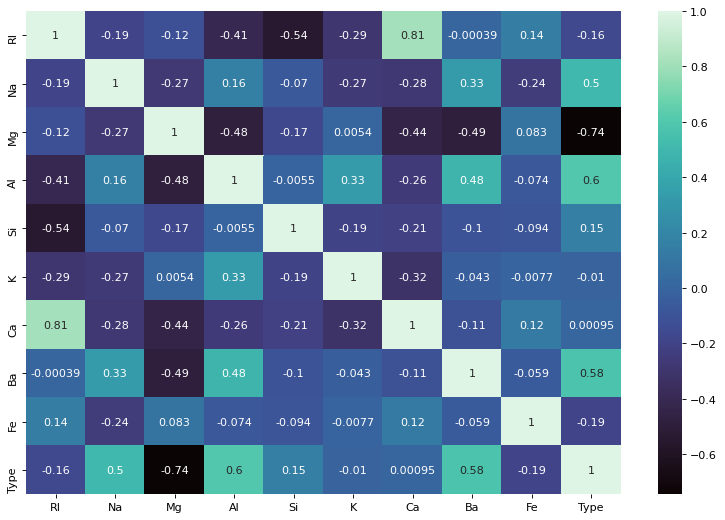

In [71]:
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(df.corr(),cmap='mako',annot=True)

<AxesSubplot:>

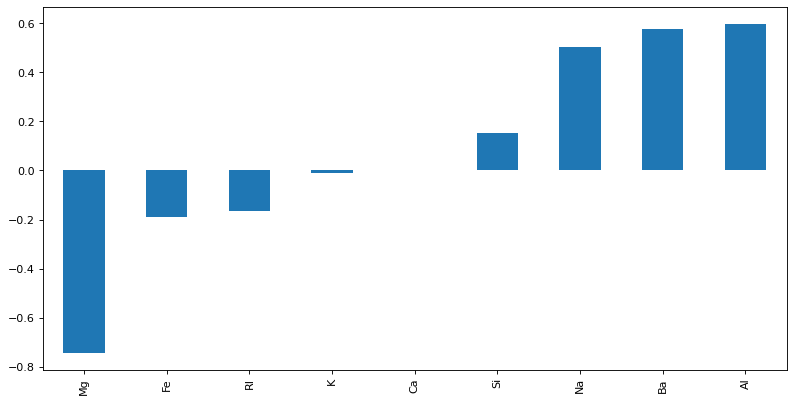

In [72]:
plt.figure(figsize=(12,6),dpi=80)
df.corr()['Type'].drop('Type').sort_values().plot(kind='bar')

this is the imbalance classes


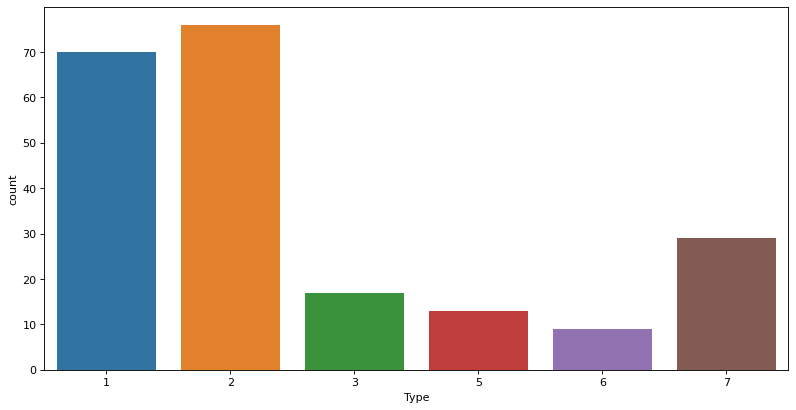

In [73]:
plt.figure(figsize=(12,6),dpi=80)
sns.countplot(data=df,x='Type')
print('this is the imbalance classes')

# classification through scatterplot

<AxesSubplot:xlabel='RI', ylabel='Na'>

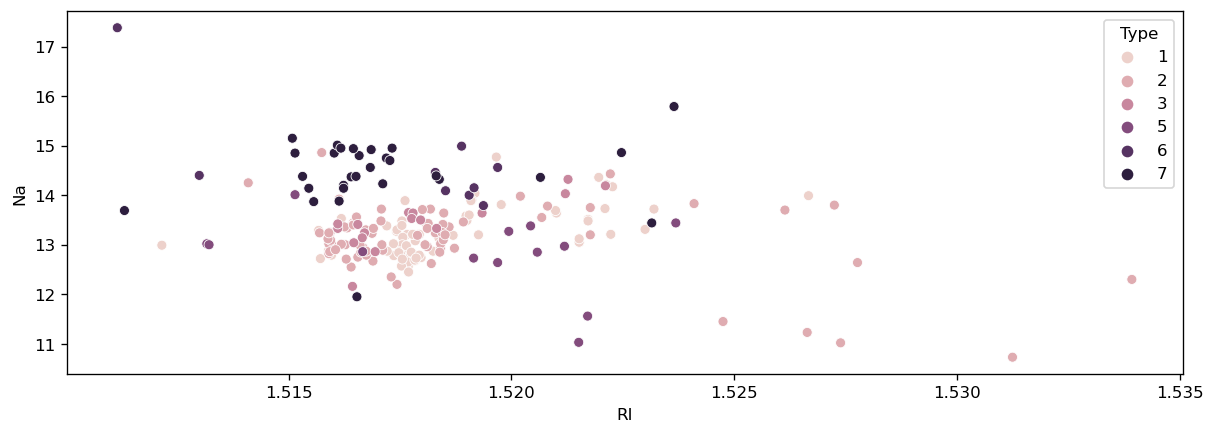

In [85]:
plt.figure(figsize=(12,4),dpi=120)
sns.scatterplot(data=df,x='RI',y='Na',hue='Type')

<AxesSubplot:xlabel='Si', ylabel='K'>

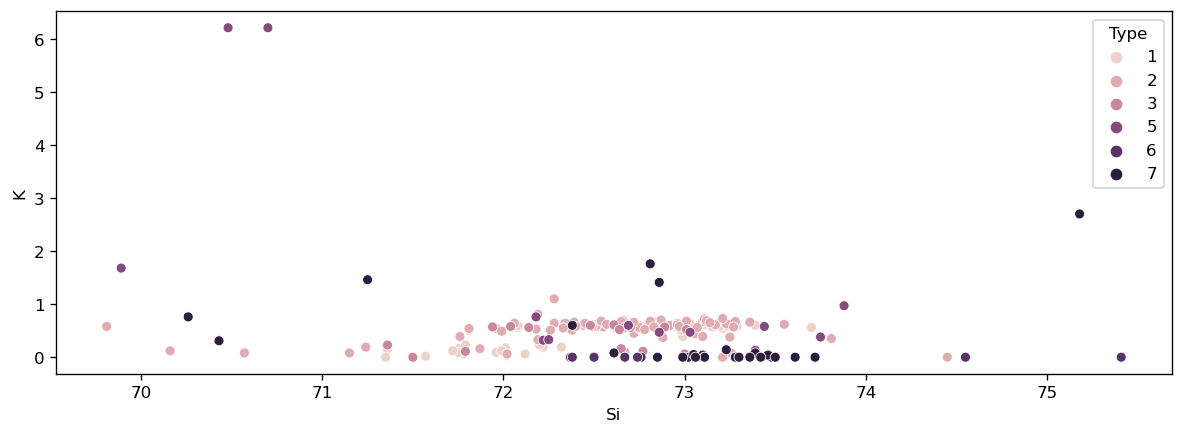

In [84]:
plt.figure(figsize=(12,4),dpi=120)
sns.scatterplot(data=df,x='Si',y='K',hue='Type')

<AxesSubplot:xlabel='Ca', ylabel='Ba'>

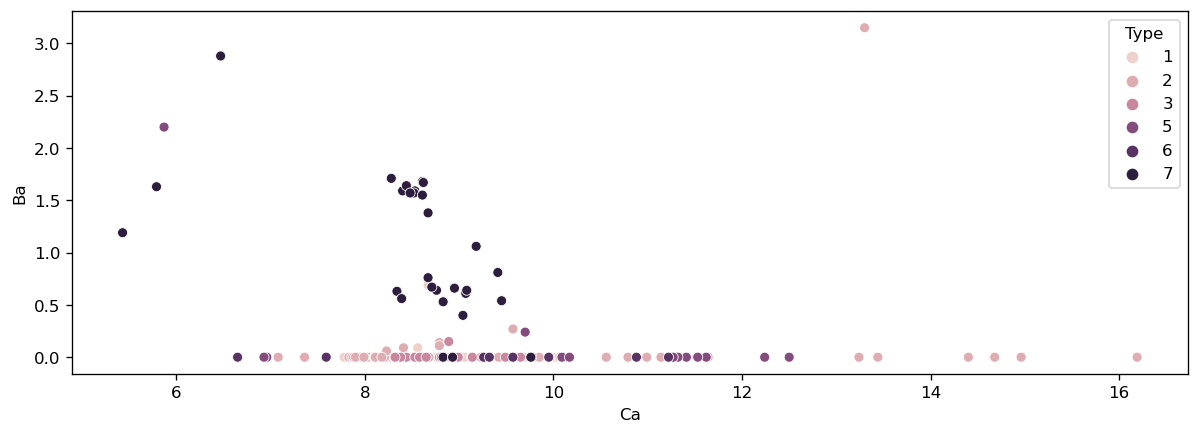

In [86]:
plt.figure(figsize=(12,4),dpi=120)
sns.scatterplot(data=df,x='Ca',y='Ba',hue='Type')

## Distribution of features

<AxesSubplot:xlabel='RI', ylabel='Density'>

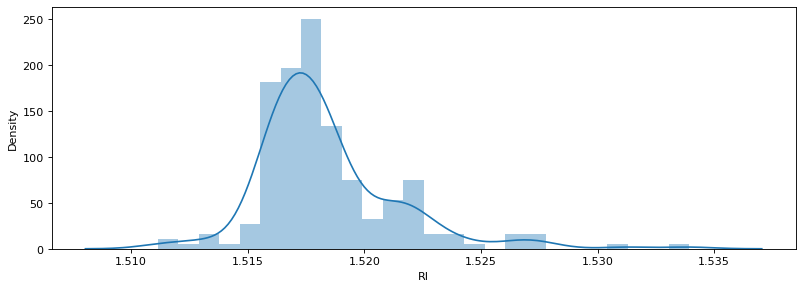

In [89]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['RI'])

<AxesSubplot:xlabel='Na', ylabel='Density'>

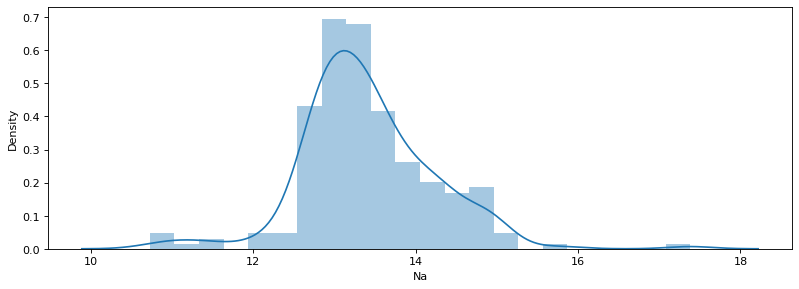

In [90]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Density'>

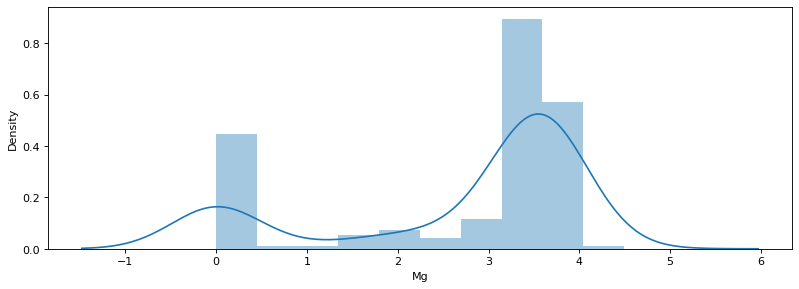

In [91]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Mg'])

<AxesSubplot:xlabel='Si', ylabel='Density'>

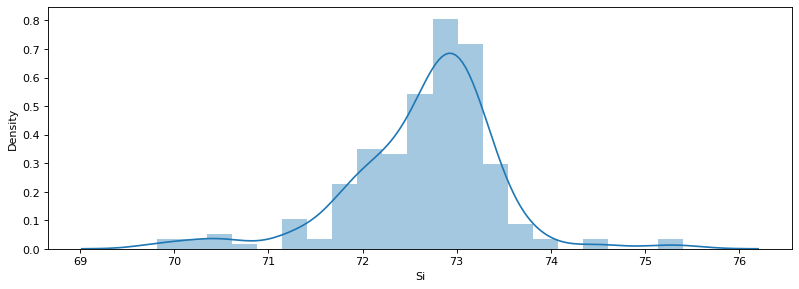

In [92]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Si'])

<AxesSubplot:xlabel='K', ylabel='Density'>

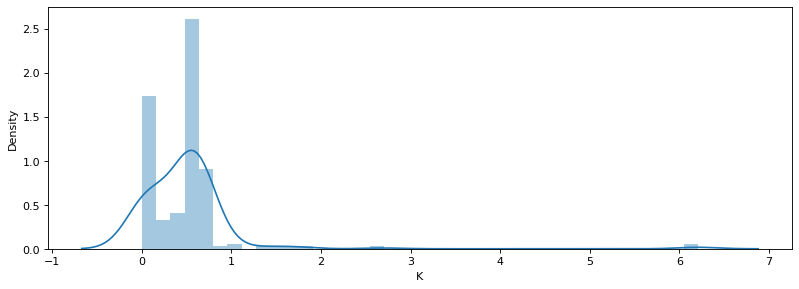

In [93]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['K'])

<AxesSubplot:xlabel='Ca', ylabel='Density'>

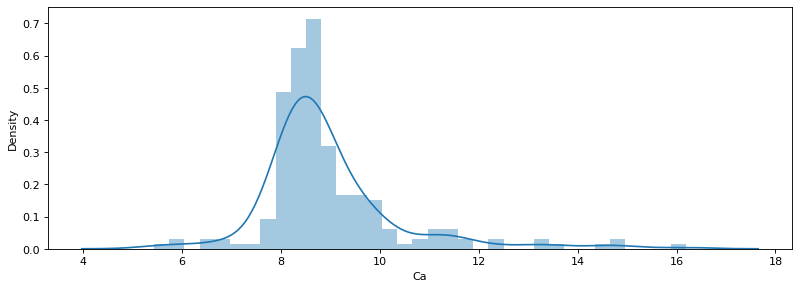

In [94]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Density'>

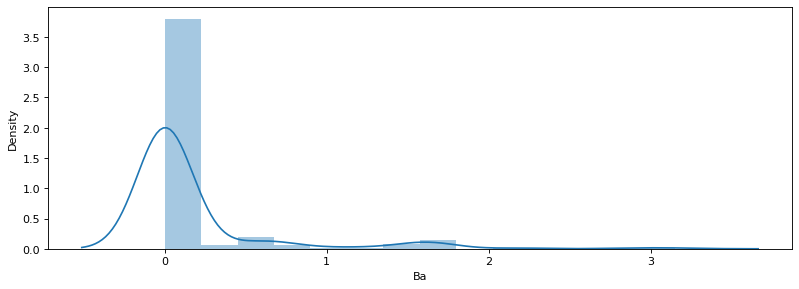

In [95]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Density'>

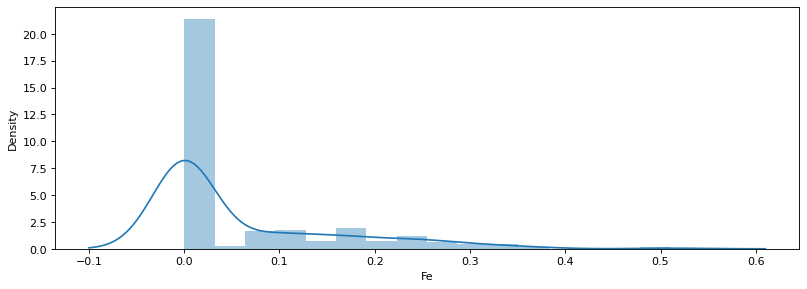

In [96]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(df['Fe'])

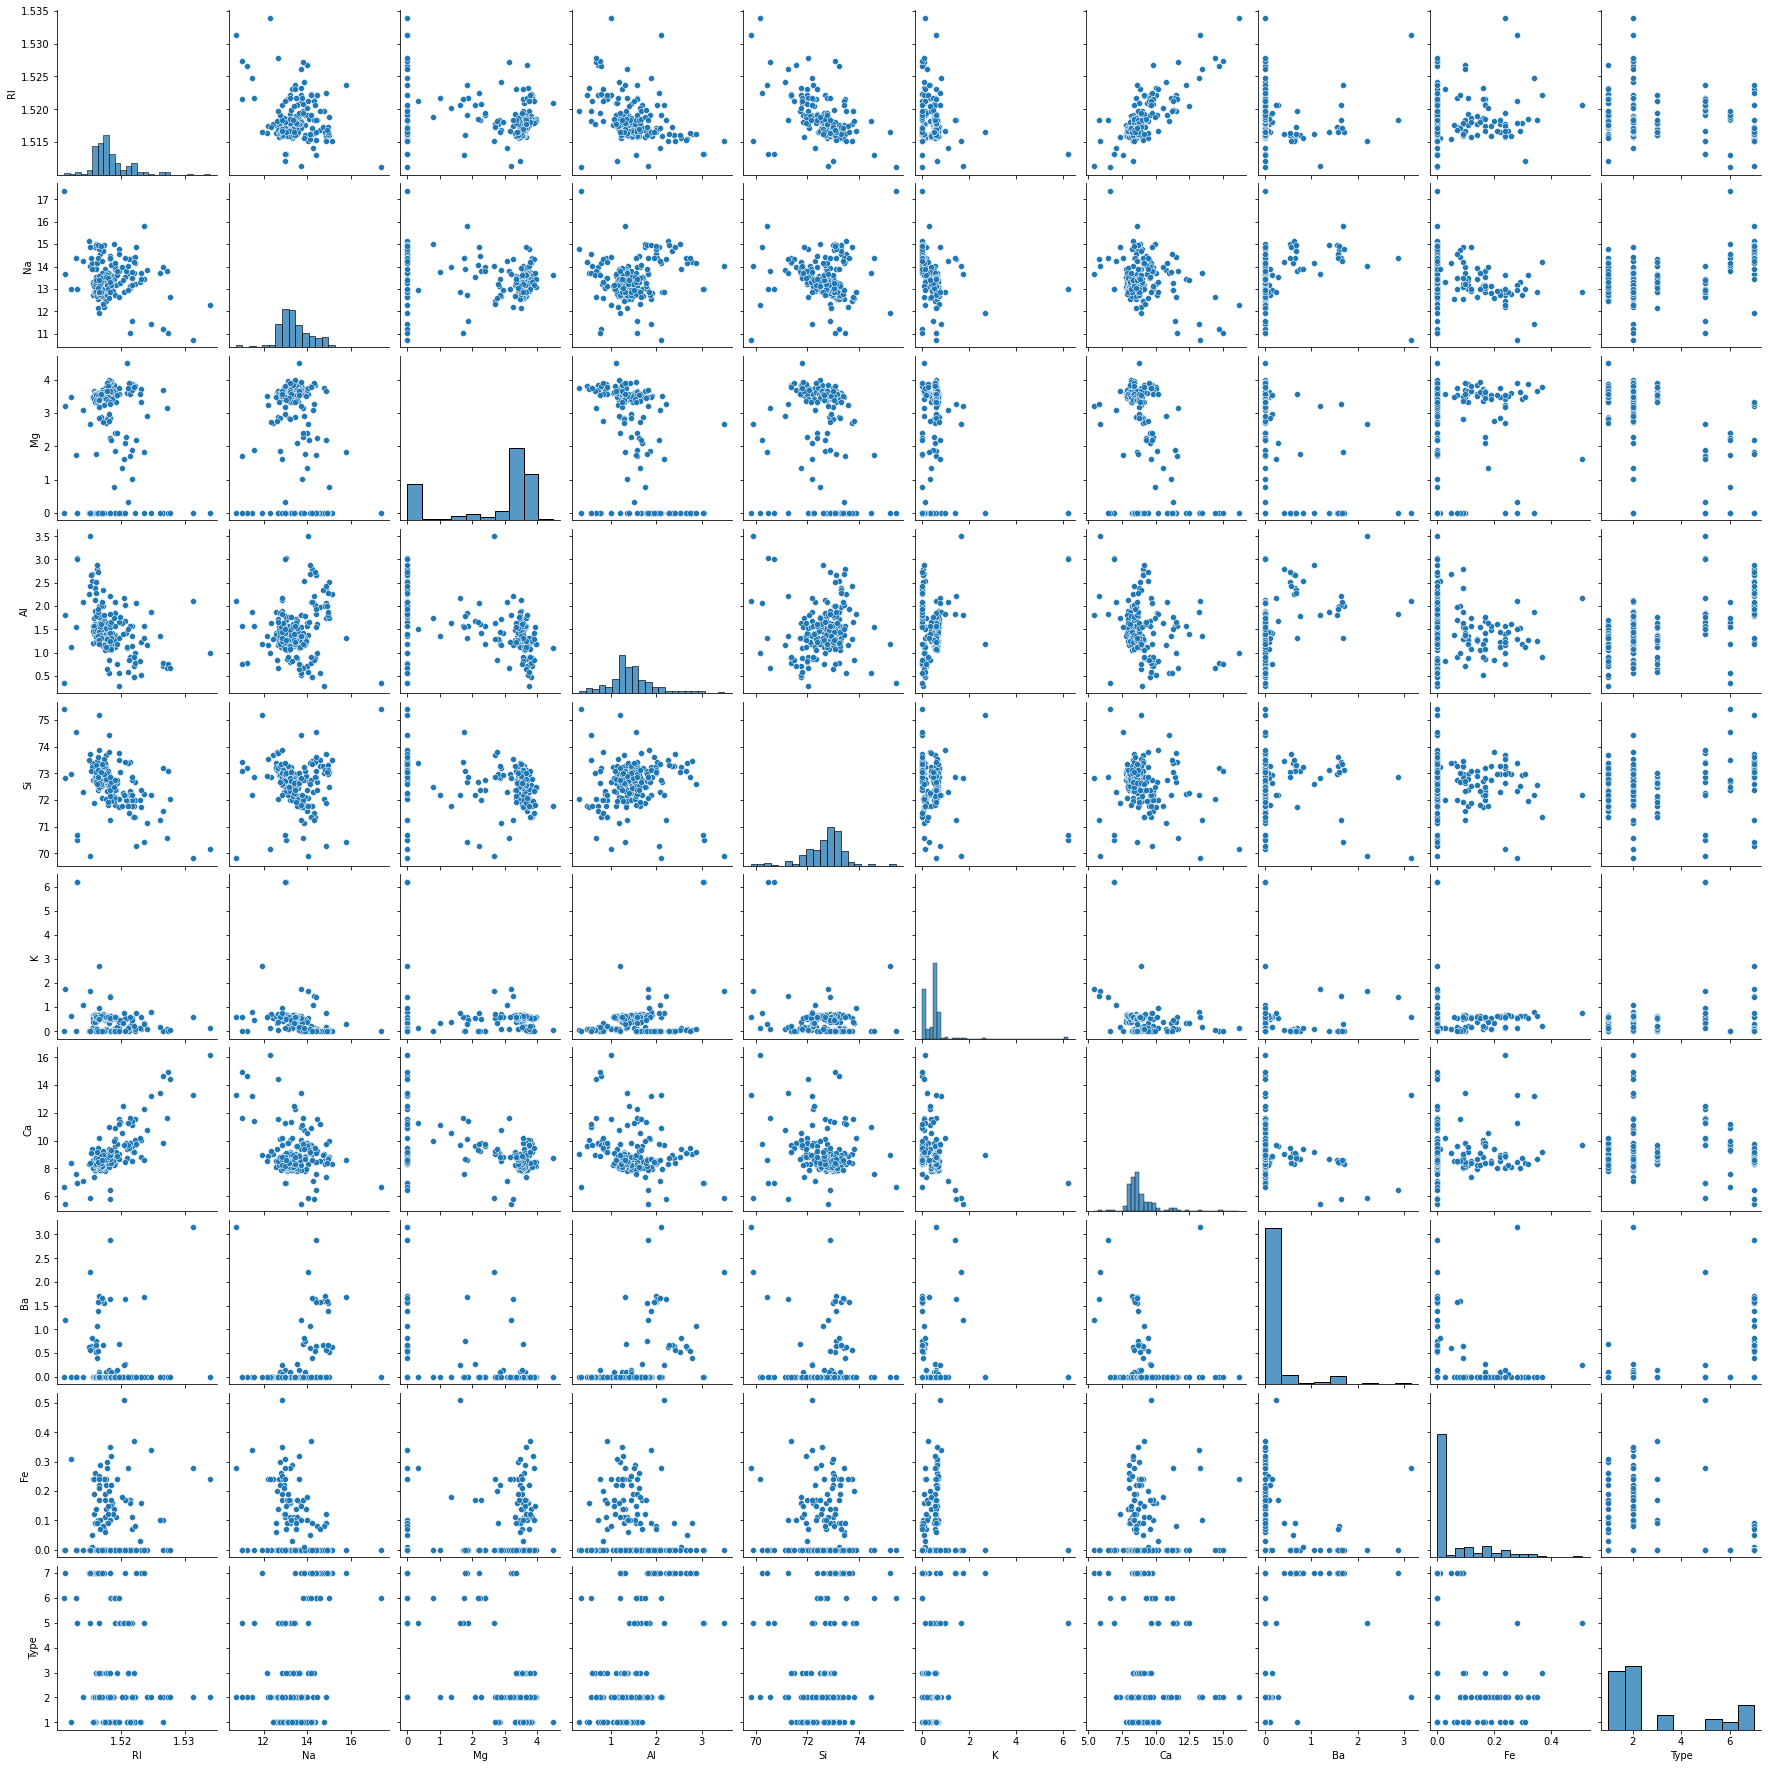

In [69]:
sns.pairplot(df)

# Data preprocessing

In [11]:
X = df.drop('Type',axis=1)

In [12]:
y = df['Type']

# train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# feature scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Function that return all classifire's accuracy 

In [23]:
from sklearn.metrics import classification_report,accuracy_score
def accuracy(scaled_X_train,y_train,scaled_X_test,y_test):
    
    modelR = RandomForestClassifier()
    modelR.fit(scaled_X_train,y_train)
    predR = modelR.predict(scaled_X_test)
    
    modelD = DecisionTreeClassifier()
    modelD.fit(scaled_X_train,y_train)
    predD = modelD.predict(scaled_X_test)
    
    modelA = AdaBoostClassifier()
    modelA.fit(scaled_X_train,y_train)
    predA = modelA.predict(scaled_X_test)
    
    modelL =  LogisticRegression()
    modelL.fit(scaled_X_train,y_train)
    predL = modelL.predict(scaled_X_test)
    
    pred = [predR,predA,predD,predL]
    accuracy = []
    for i in  pred:
        score = accuracy_score(y_test,i)
        accuracy.append(score)
        
    algo = ['RandomForestClassifier','AdaBoostClassifier','DecisionTreeClassifier','LogisticRegression']
    data = accuracy
    df = pd.DataFrame(data=data,index=algo,columns=['accuracy'])
        
    return df,df.plot(kind='bar')

(                        accuracy
 RandomForestClassifier  0.788732
 AdaBoostClassifier      0.535211
 DecisionTreeClassifier  0.647887
 LogisticRegression      0.535211,
 <AxesSubplot:>)

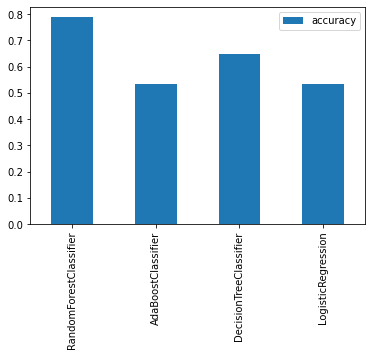

In [24]:
accuracy(scaled_X_train,y_train,scaled_X_test,y_test) 

##### Now the randon forrest was best (0.788732) amoung all algorithm on it's base parameters so now let's find best hyperparameter of random forrest.

# find best paramater using Gridesearchcv

In [36]:
from sklearn.model_selection import GridSearchCV 

In [37]:
model = RandomForestClassifier()

In [38]:
n_estimators=  [100, 150,200] 

In [39]:
max_depth = [10, 20, None]

In [40]:
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
             'max_features': ['auto', 'sqrt']}

In [41]:
model_gride = GridSearchCV(model,param_grid=param_grid,scoring='accuracy')

In [42]:
model_gride.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [44]:
model_gride.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}

In [45]:
model_gride.best_score_

0.7623152709359606

In [46]:
predict = model_gride.predict(scaled_X_test)

In [47]:
print(classification_report(y_test,predict)) #GridSearchCV()

              precision    recall  f1-score   support

           1       0.74      0.91      0.82        22
           2       0.77      0.68      0.72        25
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.80      1.00      0.89         4
           7       1.00      1.00      1.00        10

    accuracy                           0.79        71
   macro avg       0.79      0.76      0.77        71
weighted avg       0.79      0.79      0.78        71



# SMOTE Oversampling for Multi-Class Classification

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
oversample = SMOTE()

In [50]:
X_smoth, y_smoth = oversample.fit_resample(X, y)

In [51]:
counter = Counter(y_smoth)

<AxesSubplot:xlabel='Type', ylabel='count'>

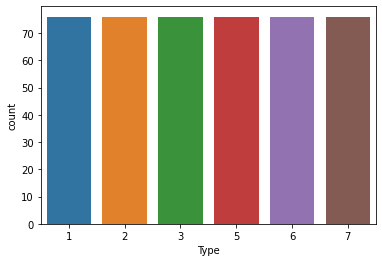

In [52]:
sns.countplot(y_smoth)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_smoth, y_smoth, test_size=0.33, random_state=42)

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

(                        accuracy
 RandomForestClassifier  0.880795
 AdaBoostClassifier      0.456954
 DecisionTreeClassifier  0.834437
 LogisticRegression      0.622517,
 <AxesSubplot:>)

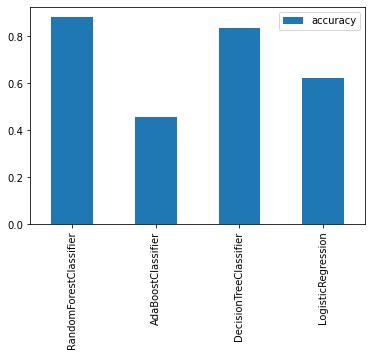

In [56]:
accuracy(scaled_X_train,y_train,scaled_X_test,y_test) 

here we got (0.880795) accuracy on random forrest which is higest amoung other classifiers. now find best hyperparameters

# Gridesearchcv on  SMOTE Imbalanced Classification

In [57]:
model = RandomForestClassifier()

In [58]:
n_estimators=  [100,125,150] 

In [61]:
max_depth = [10,12,15, None]

In [62]:
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
             'max_features': ['auto', 'sqrt']}

In [63]:
model_gride = GridSearchCV(model,param_grid=param_grid,scoring='accuracy')

In [64]:
model_gride.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 125, 150]},
             scoring='accuracy')

In [65]:
model_gride.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 150}

In [66]:
predict = model_gride.predict(scaled_X_test)

In [67]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.90      0.63      0.75        30
           2       0.86      0.86      0.86        28
           3       0.68      1.00      0.81        19
           5       1.00      1.00      1.00        19
           6       0.96      1.00      0.98        24
           7       1.00      0.97      0.98        31

    accuracy                           0.89       151
   macro avg       0.90      0.91      0.90       151
weighted avg       0.91      0.89      0.89       151



# Thank you